This is based from an attempt on https://www.dataquest.io/blog/web-scraping-beautifulsoup/

In [1]:
import requests
url = "http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1"
page = requests.get(url)
print(page.text[:1000])




<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
        <title>Released between 2017-01-01 and 2017-12-31
(Sorted by Number of Votes Descending) - IMDb</title>
  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if

In [2]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.text, 'html.parser')
print(soup.prettify)

<bound method Tag.prettify of 
<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Released between 2017-01-01 and 2017-12-31
(Sorted by Number of Votes Descending) - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
     

In [3]:
# can straight find the html part without doing down parent tree
movies = soup.find_all('div',class_="lister-item mode-advanced")

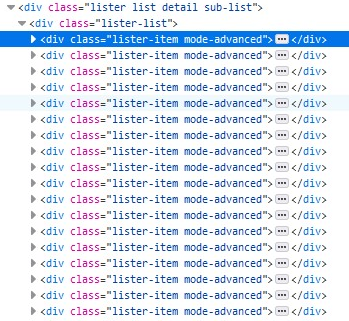

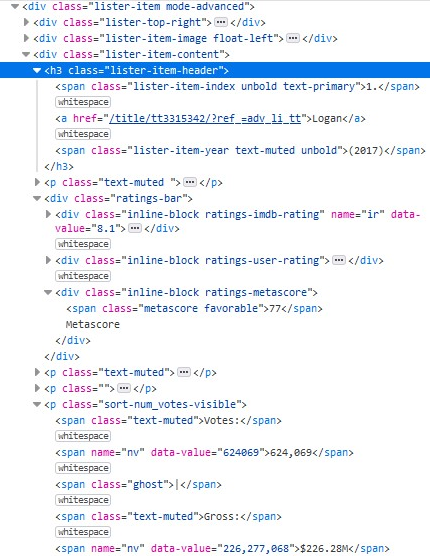


In [4]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

for item in movies:
    
    if item.find('div',class_="inline-block ratings-metascore") is not None:
        
        # can do dot notation if item is unique in list, no need care about parent item
        title = item.h3.a.text
        stars = item.strong.text # or item.find('strong').text

        # use find(elems, attributes) if got similar elements
        # distinguished by their atributes
        # if they got similar class name can just take distinguishing part of the name
        year = item.h3.find('span',class_="lister-item-year text-muted unbold").text
        
        # instead of class_="metascore favorable"
        meta = item.find('span',class_="metascore").text
        
        # to further specify the html tag based on element, attribute,
        # use the attrs={key:value} parameter
        vote = item.find('span', attrs = {'name':'nv'})['data-value']

        
        names.append(title)
        years.append(year)
        imdb_ratings.append(stars)
        metascores.append(meta)
        votes.append(vote)
        
        print(title.strip())
        print(stars.strip(),'/10 stars')
        print(meta.strip(),'metascore')
        print()
    

Logan
8.1 /10 stars
77 metascore

Thor: Ragnarok
7.9 /10 stars
74 metascore

Guardians of the Galaxy Vol. 2
7.6 /10 stars
67 metascore

Star Wars: Episode VIII - The Last Jedi
7.0 /10 stars
84 metascore

Wonder Woman
7.4 /10 stars
76 metascore

Dunkirk
7.9 /10 stars
94 metascore

Spider-Man: Homecoming
7.4 /10 stars
73 metascore

Get Out
7.7 /10 stars
85 metascore

It
7.3 /10 stars
69 metascore

Blade Runner 2049
8.0 /10 stars
81 metascore

Baby Driver
7.6 /10 stars
86 metascore

Three Billboards Outside Ebbing, Missouri
8.2 /10 stars
88 metascore

Justice League
6.3 /10 stars
45 metascore

The Shape of Water
7.3 /10 stars
87 metascore

John Wick: Chapter 2
7.5 /10 stars
75 metascore

Coco
8.4 /10 stars
81 metascore

Jumanji: Welcome to the Jungle
6.9 /10 stars
58 metascore

Beauty and the Beast
7.1 /10 stars
65 metascore

Kong: Skull Island
6.6 /10 stars
62 metascore

Kingsman: The Golden Circle
6.7 /10 stars
44 metascore

Pirates of the Caribbean: Dead Men Tell No Tales
6.6 /10 stars

In [5]:
# pandas dataframe can help visualise our scraped data & check for error

import pandas as pd

review = pd.DataFrame({
        'names': names,
        'years': years,
        'imdb_ratings': imdb_ratings,
        'metascores': metascores,
        'votes': votes
})

review.info()
review

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
names           42 non-null object
years           42 non-null object
imdb_ratings    42 non-null object
metascores      42 non-null object
votes           42 non-null object
dtypes: object(5)
memory usage: 1.8+ KB


,names,years,imdb_ratings,metascores,votes
0,Logan,(2017),8.1,77,624074
1,Thor: Ragnarok,(2017),7.9,74,560822
2,Guardians of the Galaxy Vol. 2,(2017),7.6,67,546965
3,Star Wars: Episode VIII - The Last Jedi,(2017),7.0,84,545363
4,Wonder Woman,(2017),7.4,76,533103
5,Dunkirk,(2017),7.9,94,526241
6,Spider-Man: Homecoming,(2017),7.4,73,491305
7,Get Out,(I) (2017),7.7,85,468807
8,It,(I) (2017),7.3,69,440179
9,Blade Runner 2049,(2017),8.0,81,437636


In [10]:
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2016,2018)]

In [7]:
from time import sleep
from random import randint

In [11]:
# Redeclaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

#  give the headers parameter the right value to make sure we get only English content
headers = {"Accept-Language": "en-US, en;q=0.5"}

# For every year in the interval 2016-2017
for year_url in years_url:

    # For every page in the interval 1-4
    for page in pages:

        # Make a get request
        response = requests.get('http://www.imdb.com/search/title?release_date=' + year_url +
        '&sort=num_votes,desc&page=' + page, headers = headers)

        # Pause the loop
        sleep(randint(8,15))
        
        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name = container.h3.a.text
                names.append(name)

                # Scrape the year
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))

In [13]:
movie_ratings = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(movie_ratings.info())
movie_ratings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 5 columns):
movie        352 non-null object
year         352 non-null object
imdb         352 non-null float64
metascore    352 non-null int64
votes        352 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 13.9+ KB
None


,movie,year,imdb,metascore,votes
0,Deadpool,(2016),8.0,65,879104
1,Captain America: Civil War,(2016),7.8,75,641236
2,Batman v Superman: Dawn of Justice,(2016),6.4,44,609783
3,Suicide Squad,(2016),6.0,40,583774
4,Doctor Strange,(2016),7.5,72,575660
...,...,...,...,...,...
347,Darkest Hour,(2017),7.4,75,164191
348,Bright,(I) (2017),6.3,29,163715
349,Valerian and the City of a Thousand Planets,(2017),6.5,51,156632
350,Baywatch,(2017),5.5,37,155302
